In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

len(mouse_metadata)



249

In [2]:
len(study_results)

1893

In [8]:
# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

#Print head
combined_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
#Make sure length is the same
len(combined_data_df)

1893

In [12]:
# Checking the number of mice in the DataFrame.
len(combined_data_df["Mouse ID"].unique())

249

In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"]
duplicate_mouse_id

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [19]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data_df.loc[combined_data_df["Mouse ID"]=="g989"]

duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

no_duplicates_df = combined_data_df[combined_data_df['Mouse ID'].isin(duplicate_mouse_id)==False]

# Checking the number of mice in the clean DataFrame.
len(no_duplicates_df["Mouse ID"].unique())

1880

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugs = no_duplicates_df["Drug Regimen"].value_counts()

drugs


# This method is the most straightforward, creating multiple series and putting them all together at the end.

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

In [39]:
#Group them by drug and get the mean of each drug's Tumor Volume
drug_mean = no_duplicates_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

drug_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [40]:
drug_median = no_duplicates_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

drug_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [33]:
drug_variance = no_duplicates_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

drug_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [34]:
drug_standarddev = no_duplicates_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

drug_standarddev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [35]:
drug_sem = no_duplicates_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

drug_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

summary_table = pd.DataFrame({"Mean Tumor Volume":drug_mean, 
                             "Median Tumor Volume":drug_median})

summary_table

,Mean Tumor Volume,Median Tumor Volume
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.320930,50.446266
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


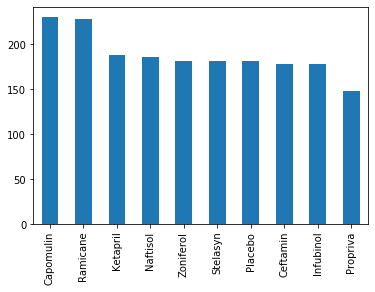

In [42]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

drugs = no_duplicates_df["Drug Regimen"].value_counts()

drugs.plot(kind="bar")